<a href="https://colab.research.google.com/github/ddesai-sjsu/Data-Mining/blob/main/Clusterting_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Algorithms**

## **K-Means clustering from scratch**

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

### Import diabetes dataset from google drive

In [7]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id='10ZC1UfGanttjIqmdWb7uGcnSLovnRUyy'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Diabetes.zip')

In [8]:
import zipfile
with zipfile.ZipFile('/content/Diabetes.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

### Read dataset into dataframe using pandas library

In [9]:
df = pd.read_csv('/content/dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Visualizing dataframe using scatter

Text(0, 0.5, 'Glucose')

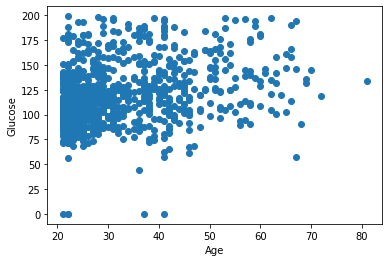

In [22]:
plt.scatter(df.Age,df.Glucose)
plt.xlabel('Age')
plt.ylabel('Glucose')

### Finding number of clusters using ELbow method

In [31]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Glucose']])
    sse.append(km.inertia_)

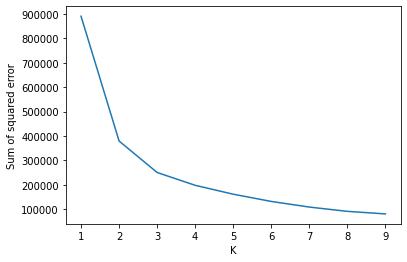

In [32]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### Plotting clusters(4) using KMeans

In [26]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Age','Glucose']])
y_predicted

array([0, 1, 2, 1, 0, 3, 1, 3, 2, 0, 3, 2, 0, 2, 2, 3, 3, 3, 3, 3, 0, 3,
       2, 3, 0, 0, 0, 3, 0, 3, 3, 2, 1, 1, 0, 3, 0, 3, 1, 3, 2, 0, 3, 2,
       2, 2, 0, 1, 3, 3, 3, 3, 1, 2, 0, 1, 2, 3, 0, 3, 1, 0, 1, 0, 3, 3,
       3, 3, 3, 0, 3, 0, 0, 0, 1, 1, 1, 3, 0, 3, 3, 1, 1, 3, 0, 3, 3, 3,
       0, 3, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 3, 0, 1, 3,
       2, 2, 1, 1, 2, 0, 0, 1, 3, 3, 2, 3, 3, 0, 3, 1, 3, 3, 3, 3, 2, 0,
       2, 1, 3, 0, 3, 1, 0, 3, 0, 3, 3, 3, 0, 3, 1, 3, 0, 1, 0, 3, 2, 0,
       2, 0, 3, 3, 1, 2, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 1, 1, 1, 2,
       1, 0, 0, 0, 1, 3, 1, 1, 0, 2, 2, 0, 3, 0, 3, 0, 2, 0, 1, 2, 3, 3,
       3, 0, 3, 0, 3, 3, 3, 3, 2, 2, 3, 2, 1, 0, 2, 0, 3, 0, 3, 0, 1, 3,
       2, 2, 3, 0, 3, 1, 3, 2, 2, 3, 0, 0, 1, 3, 1, 2, 2, 2, 2, 3, 1, 1,
       0, 3, 0, 2, 0, 2, 0, 3, 3, 0, 1, 1, 1, 3, 3, 3, 2, 2, 2, 0, 3, 0,
       0, 3, 0, 0, 3, 0, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 2, 3, 0,
       0, 3, 3, 3, 1, 3, 0, 0, 2, 0, 0, 0, 3, 3, 2,

In [27]:
df['cluster']=y_predicted
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,0


In [28]:
km.cluster_centers_

array([[ 36.08071749, 135.43497758],
       [ 29.04137931,  80.31034483],
       [ 38.8487395 , 174.78151261],
       [ 30.77935943, 107.47686833]])

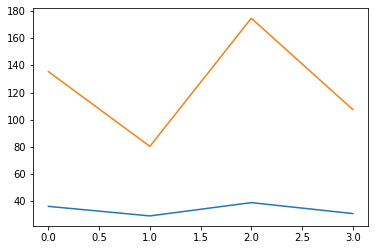

In [29]:
plt.plot(km.cluster_centers_)

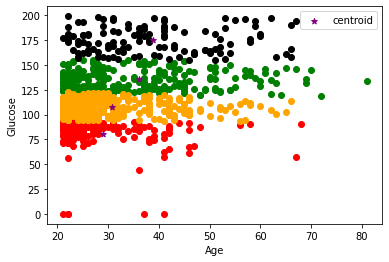

In [30]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.Age,df1.Glucose,color='green')
plt.scatter(df2.Age,df2.Glucose,color='red')
plt.scatter(df3.Age,df3.Glucose,color='black')
plt.scatter(df4.Age,df4.Glucose,color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()

## **Hierarchical clustering**

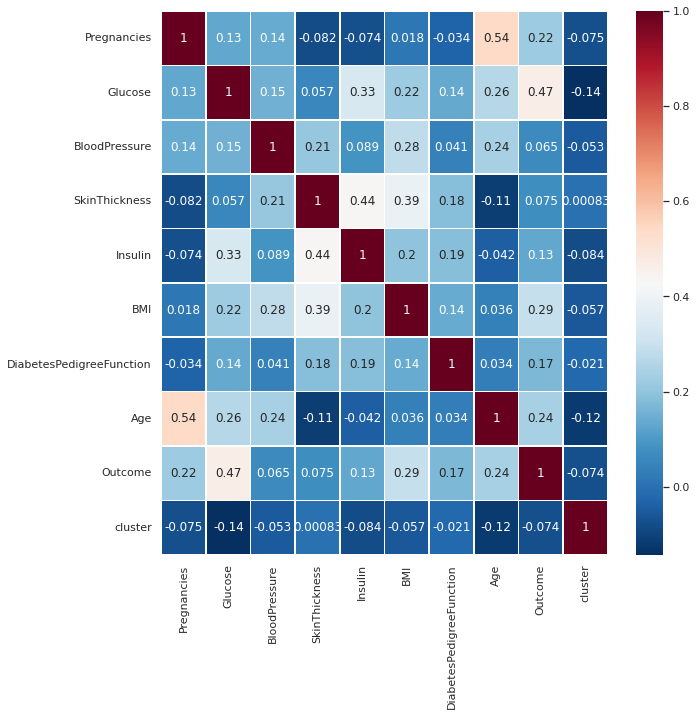

In [36]:

import seaborn as sb

pearsoncorr=df.corr()
plt.figure(1,figsize=(10,10))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
Y = df['Outcome']

In [45]:
X = df.drop(['Outcome'], axis = 1).values
Y = df['Outcome']

In [46]:
X_reduced, X_test_reduced, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

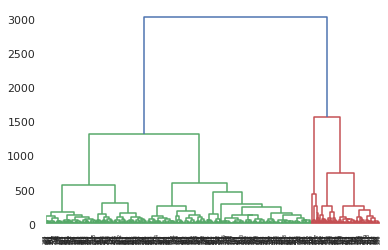

In [47]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_reduced, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
hierarchicalpredictions = hc.fit_predict(X_test_reduced)

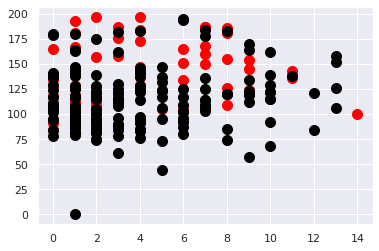

In [48]:
plt.scatter(X_test_reduced[hierarchicalpredictions ==0,0], X_test_reduced[hierarchicalpredictions == 0,1], s=100, c='red')
plt.scatter(X_test_reduced[hierarchicalpredictions ==1,0], X_test_reduced[hierarchicalpredictions == 1,1], s=100, c='black')

## **Gaussian mixture models clustering**

In [62]:
isDiabetic =  df['Outcome']==1
isDiabetic.head()

0     True
1    False
2     True
3    False
4     True
Name: Outcome, dtype: bool

In [63]:
diabeticPatients = df[isDiabetic]
diabeticPatients.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
0,6,148,72,35,0,33.6,0.627,50,1,0
2,8,183,64,0,0,23.3,0.672,32,1,2
4,0,137,40,35,168,43.1,2.288,33,1,0
6,3,78,50,32,88,31.0,0.248,26,1,1
8,2,197,70,45,543,30.5,0.158,53,1,2


In [64]:
from sklearn.cluster import KMeans
df1=diabeticPatients[['Glucose','Age']]
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df1)
    Sum_of_squared_distances.append(km.inertia_)

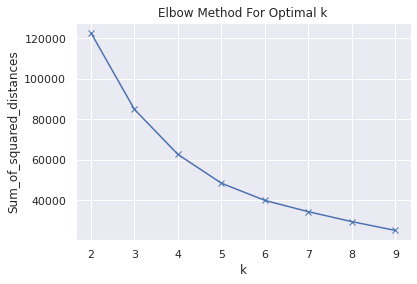

In [65]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [66]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=4, covariance_type="spherical").fit(df1[['Glucose','Age']])
labels = gmm.predict(df1[['Glucose','Age']])

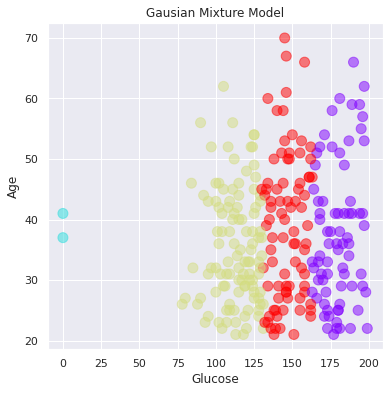

In [67]:
#Plotting the clusters obtained
plt.figure(figsize=(6,6))
plt.scatter(df1['Glucose'],df1['Age'], c=labels, s=100, alpha=0.5, cmap ='rainbow')
plt.title('Gausian Mixture Model')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.show()

## **DB Scan clustering**

In [69]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[['Glucose','Age']])

DBSCAN()

In [71]:
import matplotlib.pyplot as plt
import matplotlib

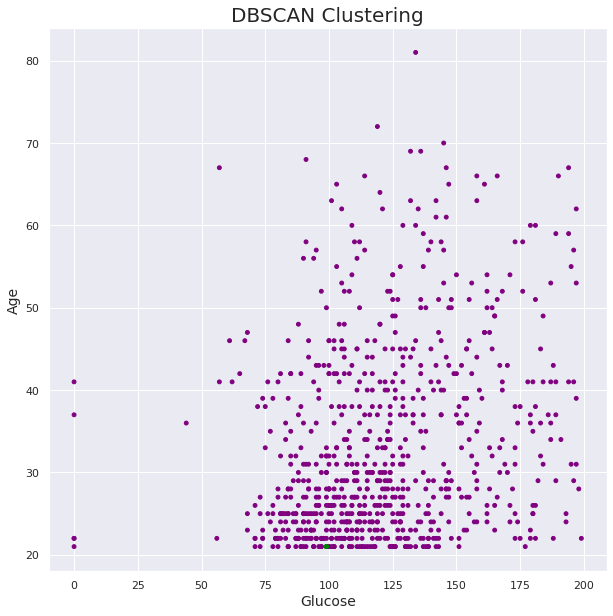

In [74]:
df['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(10,10))
colors=['purple','red','blue','green']
plt.scatter(df['Glucose'],df['Age'],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Glucose',fontsize=14)
plt.ylabel('Age',fontsize=14)
plt.show()